#### This dataset contains information about various features of houses in California and their respective median prices. Key Components to be Fulfilled: Loading and Preprocessing. Load the California Housing dataset using the fetch_california_housing function from sklearn. Convert the dataset into a pandas DataFrame for easier handling. Handle missing values (if any) and perform necessary feature scaling (e.g., standardization). 

In [17]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [18]:
#import data from skleran data set
from sklearn.datasets import fetch_california_housing

In [19]:
data = fetch_california_housing()

In [20]:
x = data.data
y = data.target
feature = data.feature_names

In [21]:
df = pd.DataFrame(x,columns = feature)
df['target'] = y

In [22]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [23]:
#check how many colums and rows
df.shape

(20640, 9)

In [24]:
#data dtype and non null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [25]:
# to get statistical information about all the numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
target,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


In [26]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

## numerical columns

In [27]:
num_col = df.select_dtypes(include = 'number')

In [28]:
num_col.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

### now we can look how our data distributed

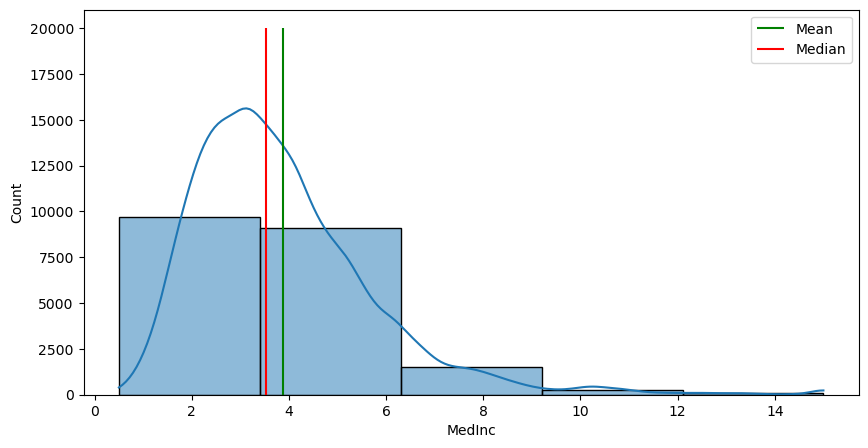

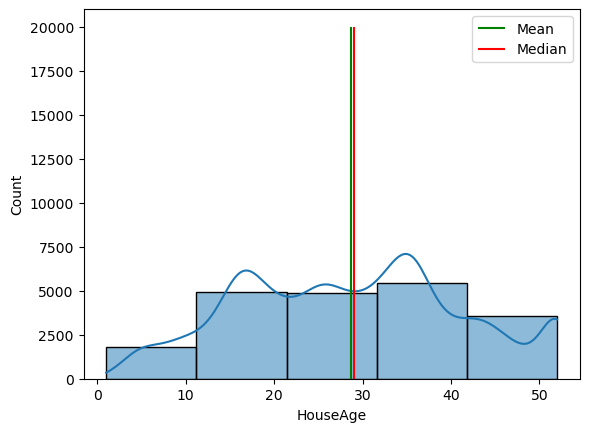

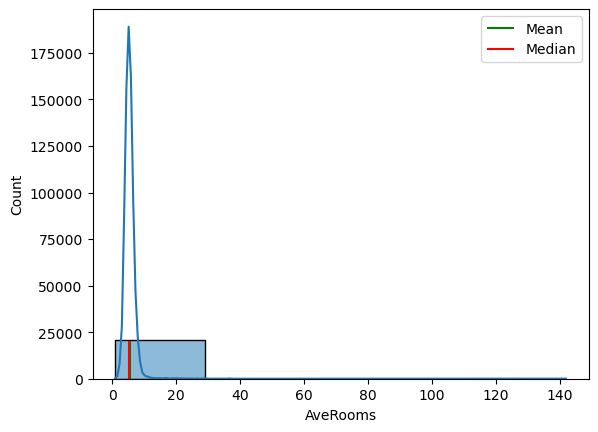

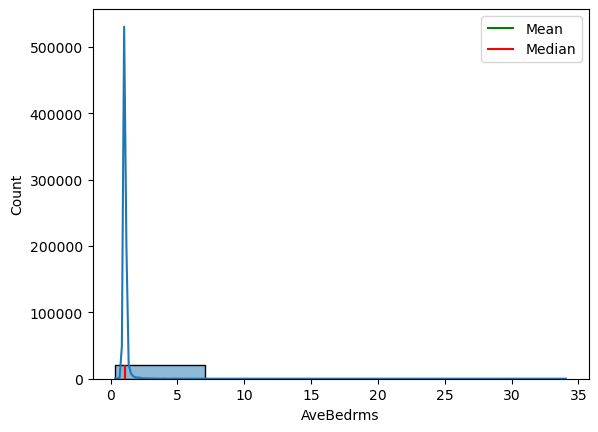

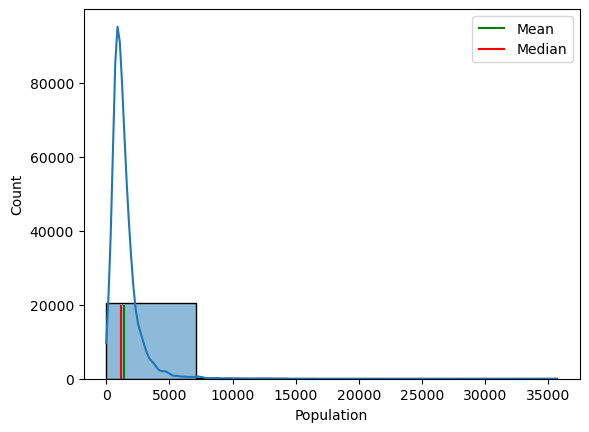

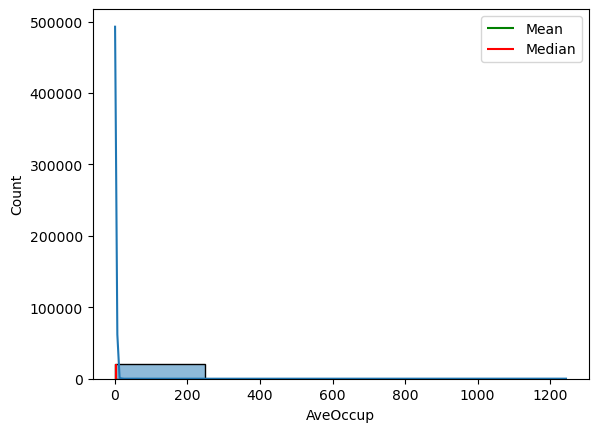

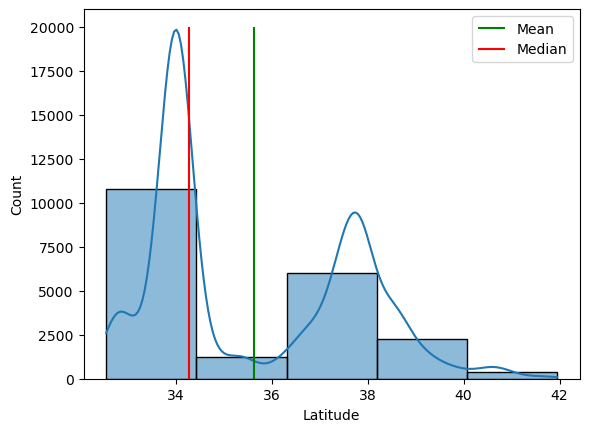

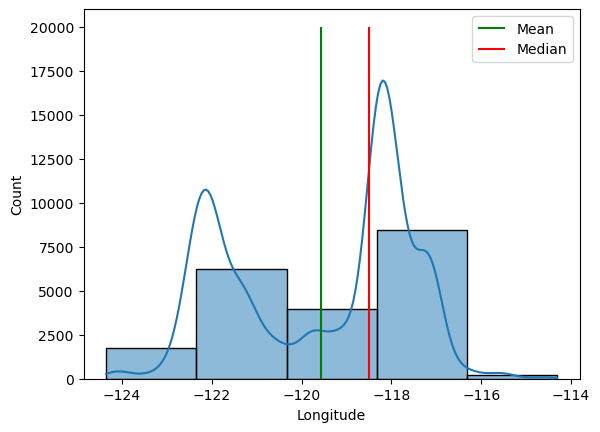

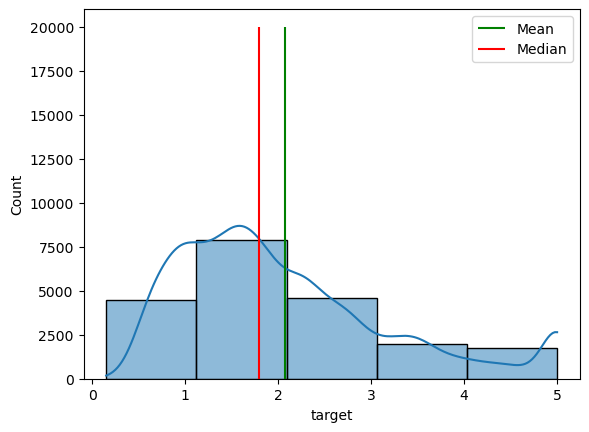

In [29]:
plt.figure(figsize=(10,5))
for i in num_col.columns:
    sns.histplot(df[i],kde=True,bins=5)
    plt.vlines(df[i].mean(),ymin=0,ymax=20000, color ='g', label='Mean')
    plt.vlines(df[i].median(),ymin=0,ymax=20000, color ='r', label='Median')
    plt.legend()
    plt.show()

### check null values

In [30]:
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [31]:
## Check if each column contains zero
columns_with_zeros = df.eq(0).any()

In [32]:
columns_with_zeros

MedInc        False
HouseAge      False
AveRooms      False
AveBedrms     False
Population    False
AveOccup      False
Latitude      False
Longitude     False
target        False
dtype: bool

### check duplicates in df

In [33]:
df.duplicated().sum()

0

### check outliers

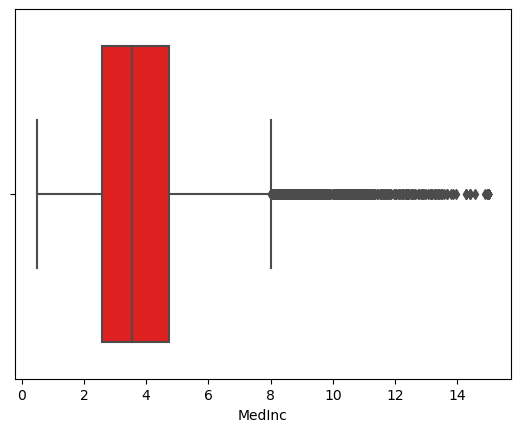

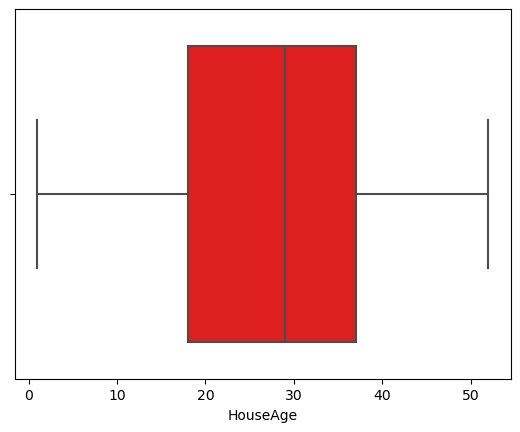

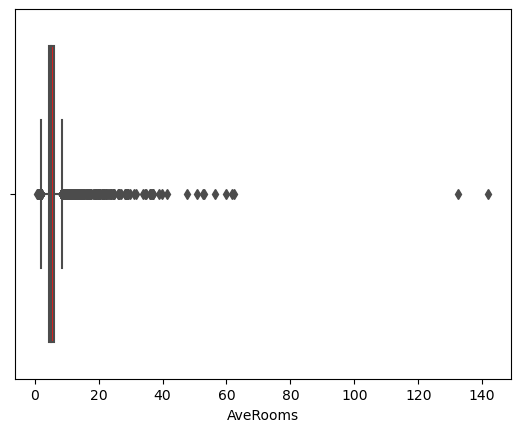

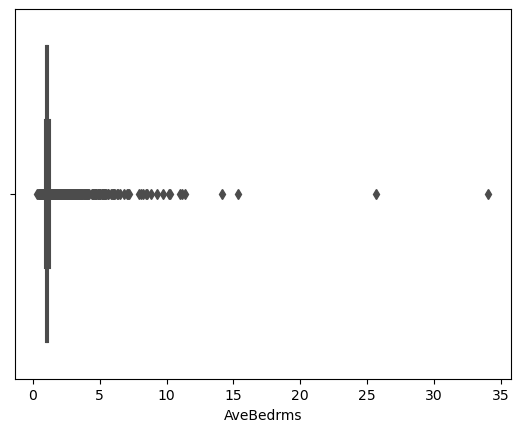

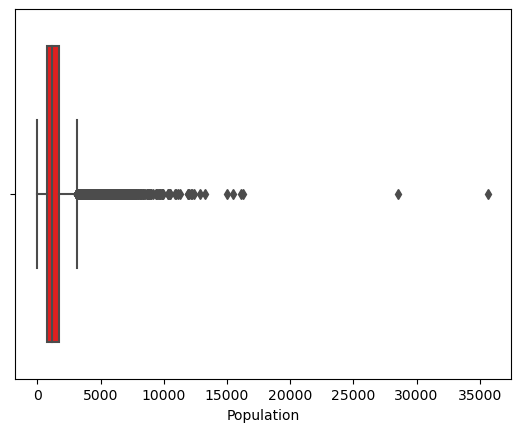

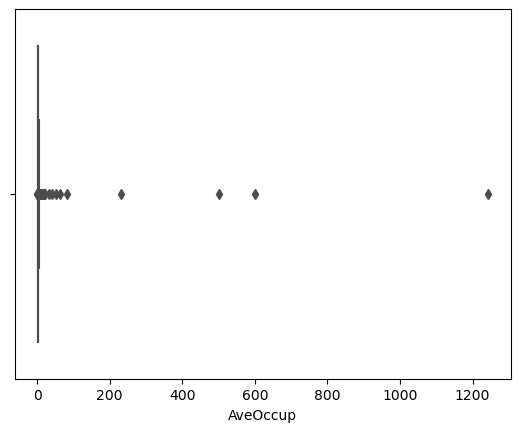

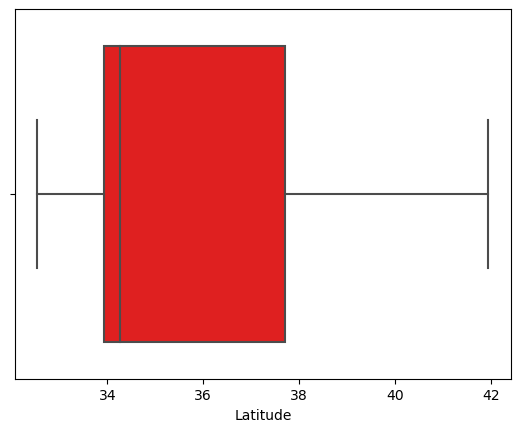

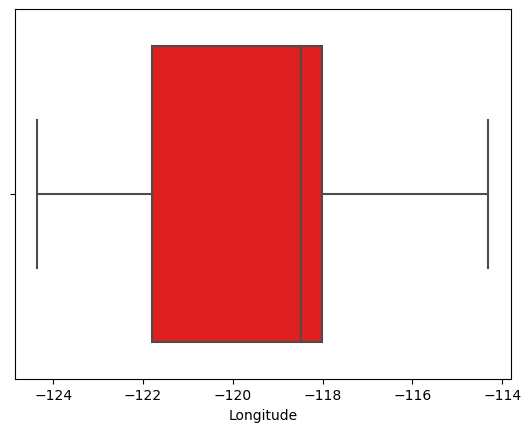

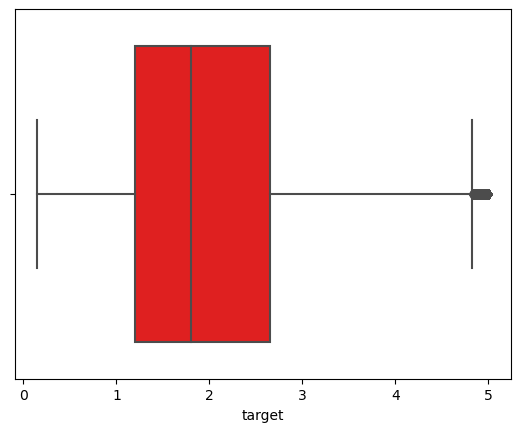

In [34]:
for col in num_col:
    sns.boxplot(data=df, x=col,color='r')
    plt.show()

## Remove outilers using IQR METHOD

In [35]:
#IQR method to detect outliers
def outliers(df):
    for col in df.select_dtypes(include = 'float64').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        Lower = Q1 -(1.5* IQR)
        Upper = Q3 + (1.5 * IQR)
        # capping
        df[col] = df[col].apply(lambda x : Lower if x < Lower else Upper if x > Upper else x)
    return df

In [36]:
df2=outliers(df)  #removing outliers we can  assign to df2

#### after removing outliers boxplot

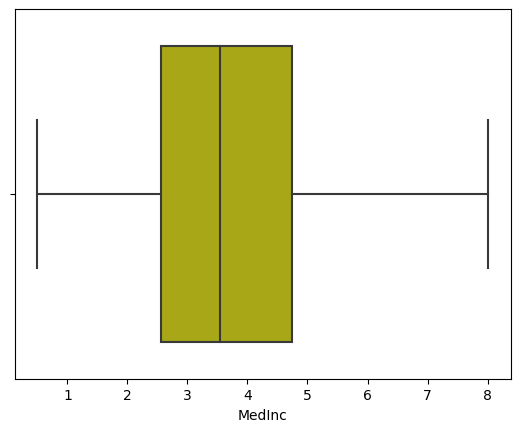

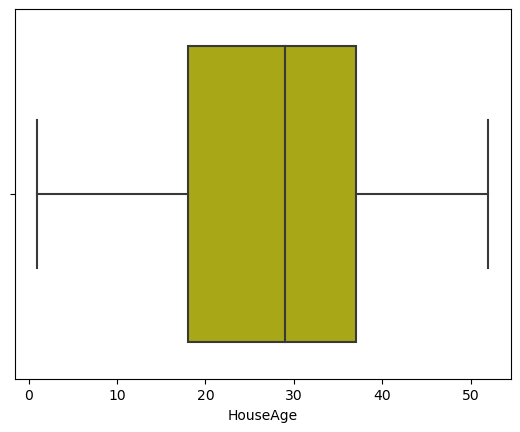

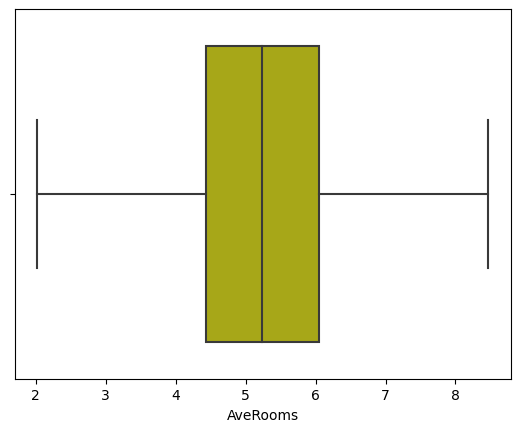

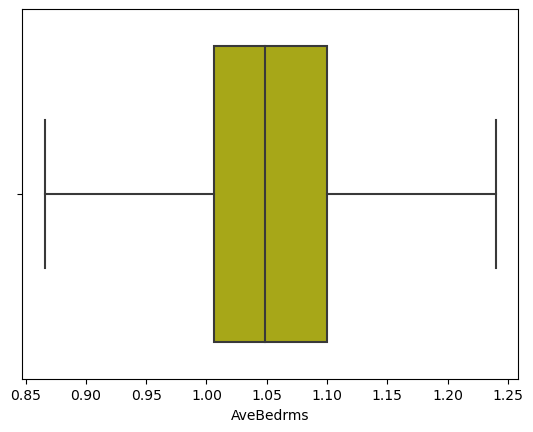

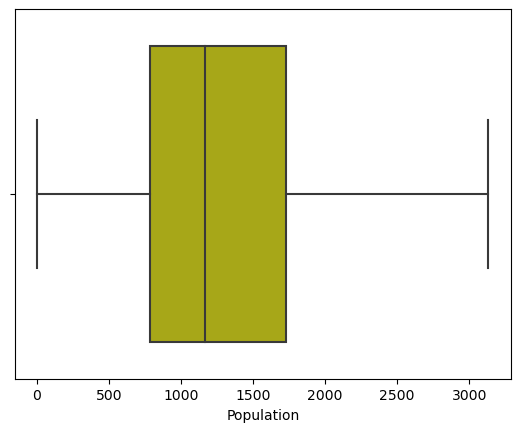

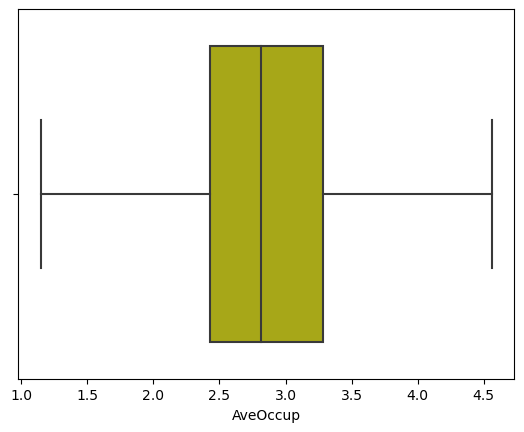

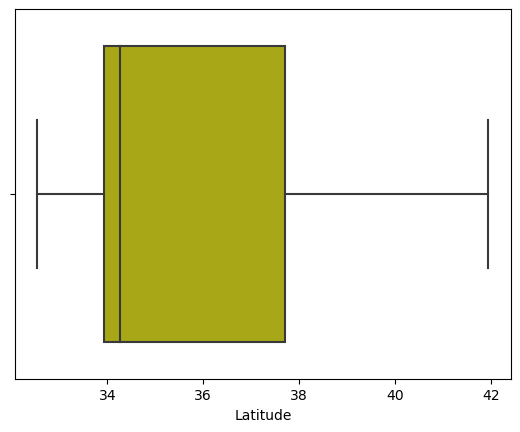

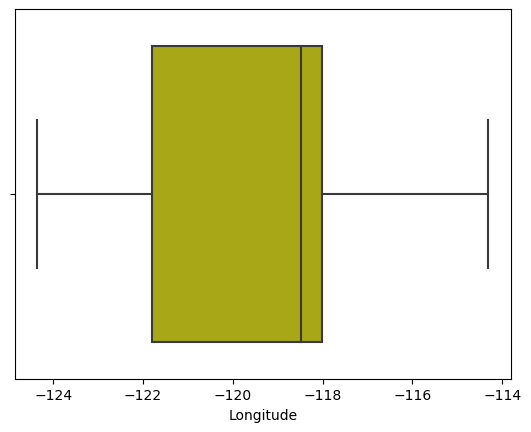

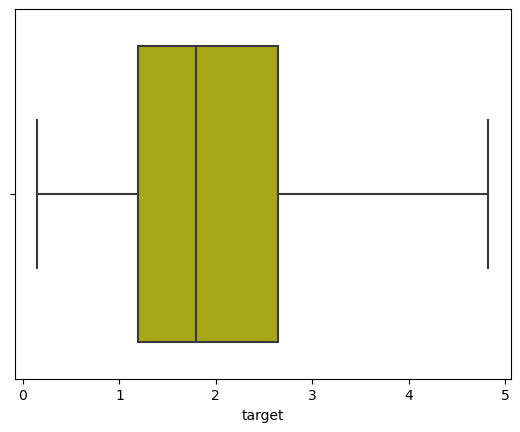

In [37]:
for col in num_col:
    sns.boxplot(data=df2,x=col,color='y')
    plt.show()

## To check skew

In [38]:
df2.skew()

MedInc        0.735618
HouseAge      0.060331
AveRooms      0.348567
AveBedrms     0.462645
Population    0.842247
AveOccup      0.510453
Latitude      0.465953
Longitude    -0.297801
target        0.912330
dtype: float64

## Between -0.5 and 0.5 are considered fairly symmetrical.
## Between -1 and -0.5 or 0.5 and 1 are moderately skewed.
## Less than -1 or greater than 1 indicate high skewness.


In [39]:
# Apply transformation to remove skewness
pt = PowerTransformer(method ='yeo-johnson')

In [40]:
# numerical features(columns)
numerical_features = df2.select_dtypes(include =['int64','float64']).columns

In [41]:
# to save skewness removed features
df2[numerical_features] = pt.fit_transform(df2[numerical_features])
df2[numerical_features].skew()

MedInc       -0.002164
HouseAge     -0.113089
AveRooms      0.002958
AveBedrms    -0.003923
Population    0.008781
AveOccup      0.000402
Latitude      0.153850
Longitude     0.000000
target        0.026767
dtype: float64

In [42]:
df3 = df2[numerical_features]

## correlation

In [43]:
correlation = df3.corr()

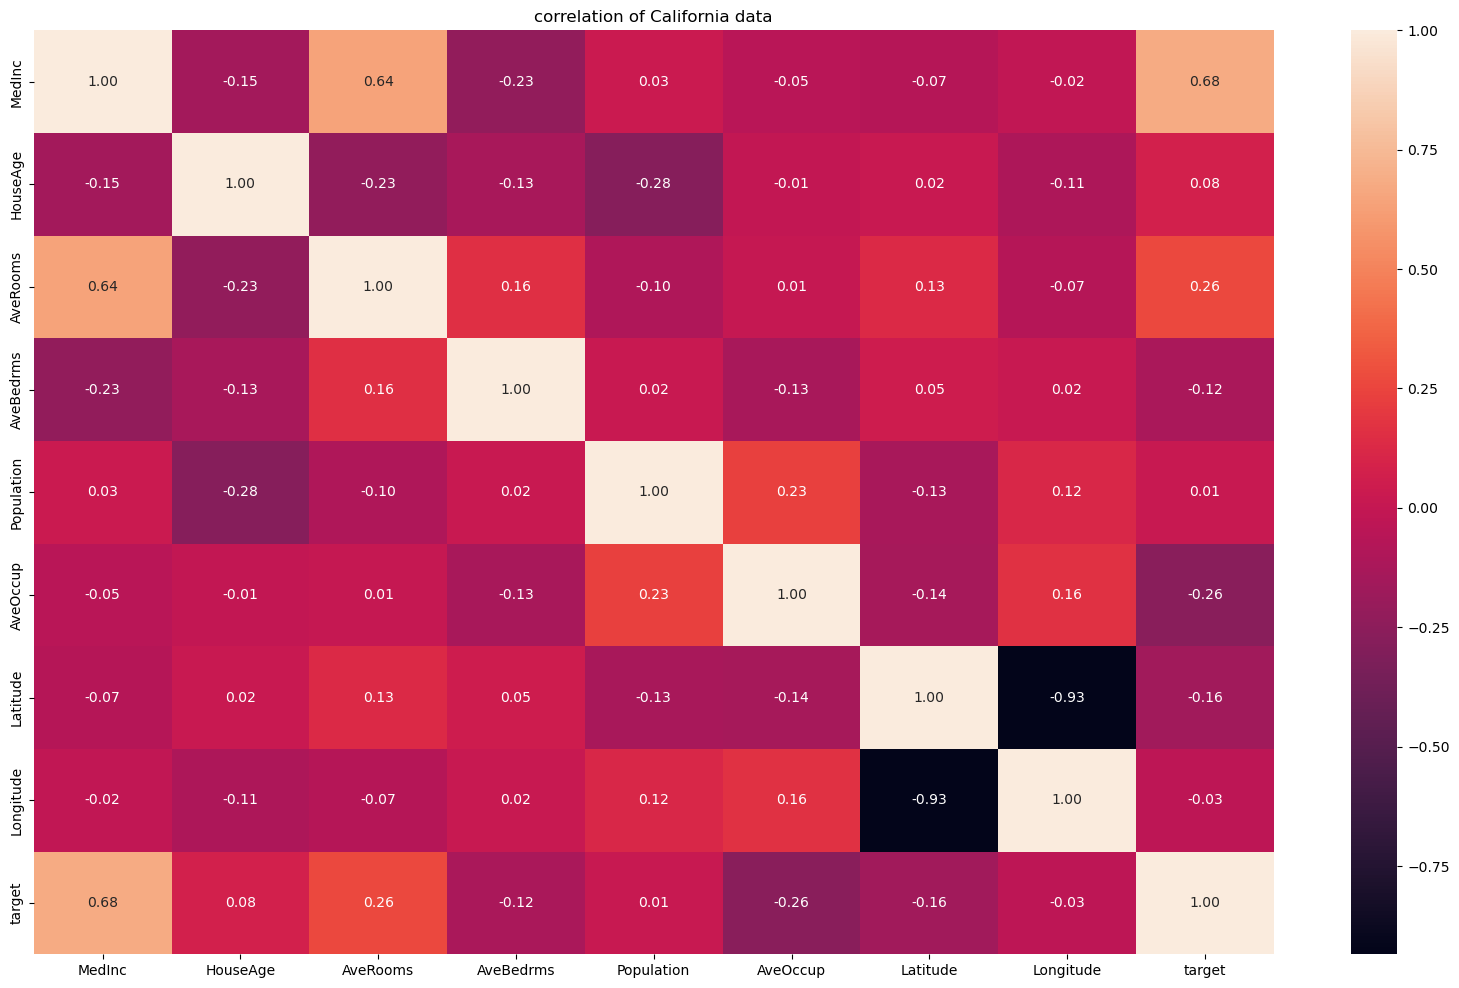

In [44]:
plt.figure(figsize=(20,12))
sns.heatmap(correlation,annot = True, fmt='.2f', cmap = 'rocket')
plt.title('correlation of California data')
plt.show()

## Feature selection

In [45]:
from sklearn.feature_selection import SelectKBest,f_regression #traget column is continuous

In [46]:
df3.columns # we should remove target column here

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

In [47]:
x =df3.drop('target',axis=1)
y = df3['target']

In [48]:
sk = SelectKBest(score_func=f_regression,k=5)

In [49]:
#fit sk to new variable

x1 = sk.fit_transform(x,y)

In [50]:
x1

array([[ 2.03229611,  1.31235099, -0.36854061, -0.43333073,  1.08903746],
       [ 2.03229611,  0.77529503, -1.10542217, -1.20373199,  1.08240369],
       [ 1.76888042,  2.18616249,  0.26936881, -0.05011249,  1.07907856],
       ...,
       [-1.49827866, -0.02323163,  0.8163172 , -0.81696541,  1.54296057],
       [-1.32710565,  0.07646286,  1.37089124, -1.17895178,  1.54296057],
       [-0.84850039,  0.01644842,  1.27152674, -0.33531784,  1.52740291]])

In [51]:
# Get selected feature names and scores
selected_features = x.columns[sk.get_support()]
feature_scores = pd.DataFrame({'Feature': x.columns, 'Score': sk.scores_}).sort_values(by='Score', ascending=False)

print("Selected Features:", selected_features)
print("\nFeature Scores:")
print(feature_scores)

Selected Features: Index(['MedInc', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude'], dtype='object')

Feature Scores:
      Feature         Score
0      MedInc  17961.958972
2    AveRooms   1544.731853
5    AveOccup   1539.962368
6    Latitude    567.435834
3   AveBedrms    302.686848
1    HouseAge    124.710759
7   Longitude     18.957391
4  Population      2.901431


## scaling

In [52]:
ss = StandardScaler()

In [53]:
x_scld = ss.fit_transform(x)

### split the data

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x_scld,y,test_size=0.2 ,random_state=42)

##  Regression Algorithm Implementation

# LinearRegression

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
m1 = LinearRegression()

In [57]:
#fit to model
m1.fit(x_train,y_train)

LinearRegression()

In [58]:
#predict

yp1 = m1.predict(x_test)

In [59]:
#Model evaluation in Regression : MAE,MSE,RMSE,R2Score

In [60]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [61]:
mae = mean_absolute_error(y_test,yp1)
mae

0.43576414686562787

In [62]:
mse = mean_squared_error(y_test,yp1)
mse

0.33257276460257784

In [63]:
rmse = np.sqrt(mean_squared_error(y_test,yp1))
rmse

0.5766912211943042

In [64]:
r2 = r2_score(y_test,yp1)
r2

0.6666318011973394

## svm- svr

In [65]:
from sklearn.svm import SVR

In [66]:
m2 = SVR()
m2.fit(x_train,y_train)

SVR()

In [67]:
yp2 = m2.predict(x_test)


In [68]:
#evaluation matrics
mae = mean_absolute_error(y_test,yp2)
mse = mean_squared_error(y_test,yp2)
rmse = np.sqrt(mean_squared_error(y_test,yp2))
r2 =  r2_score(y_test,yp2)

In [69]:
print(f"mae:{mae}\nmse:{mse}\nrmse:{rmse}\nr2:{r2}\n")

mae:0.33276055366311863
mse:0.20901971106622352
rmse:0.4571867354443078
r2:0.7904803639718748



# RandomForestRegressor

In [70]:
#ensemble
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [71]:
m3 = RandomForestRegressor()

In [72]:
m3.fit(x_train,y_train)

RandomForestRegressor()

In [73]:
yp3 = m3.predict(x_test)

In [74]:
#evaluation matrics
mae = mean_absolute_error(y_test,yp3)
mse = mean_squared_error(y_test,yp3)
rmse = np.sqrt(mean_squared_error(y_test,yp3))
r2 = r2_score(y_test,yp3)

In [75]:
print(f"mae:{mae}\nmse:{mse}\nrmse:{rmse}\nr2:{r2}\n")

mae:0.28696779364080366
mse:0.17175517801382742
rmse:0.41443356284672145
r2:0.8278340248398797



# GradientBoostingRegressor

In [76]:
m4 = GradientBoostingRegressor()

In [77]:
m4.fit(x_train,y_train)

GradientBoostingRegressor()

In [78]:
yp4 = m4.predict(x_test)

In [79]:
mae = mean_absolute_error(y_test,yp4)
mse = mean_squared_error(y_test,yp4)
rmse = np.sqrt(mean_squared_error(y_test,yp4))
r2 = r2_score(y_test,yp4)

In [80]:
print(f"mae:{mae}\nmse:{mse}\nrmse:{rmse}\nr2:{r2}\n")

mae:0.3299620846760112
mse:0.20289991511058078
rmse:0.4504441309536409
r2:0.7966147970100413



# DecisionTreeRegressor

In [81]:
from sklearn.tree import DecisionTreeRegressor

In [82]:
m5 = DecisionTreeRegressor()

In [83]:
m5.fit(x_train,y_train)

DecisionTreeRegressor()

In [84]:
yp5 = m5.predict(x_test)

In [85]:
#evaluation matrics
mae = mean_absolute_error(y_test,yp5)
mse = mean_squared_error(y_test,yp5)
rmse = np.sqrt(mse)
r2 =r2_score(y_test,yp5)

In [86]:
print(f"mae:{mae}\nmse:{mse}\nrmse:{rmse}\nr2:{r2}\n")


mae:0.40538499838165826
mse:0.34832795758806473
rmse:0.590193152779719
r2:0.6508389255731539



# AdaBoostRegressor

In [87]:
from sklearn.ensemble import AdaBoostRegressor

In [88]:
m6 = AdaBoostRegressor()

In [89]:
m6.fit(x_train,y_train)

AdaBoostRegressor()

In [90]:
yp6 = m6.predict(x_test)

In [91]:
#evaluation matrics
mae = mean_absolute_error(y_test,yp6)
mse = mean_squared_error(y_test,yp6)
rmse = np.sqrt(mse)
r2 =r2_score(y_test,yp6)

In [92]:
print(f"mae:{mae}\nmse:{mse}\nrmse:{rmse}\nr2:{r2}\n")

mae:0.5231256633732189
mse:0.4215921877191225
rmse:0.6493013073443812
r2:0.5773994649948326



# MLPRegressor

In [93]:
from sklearn.neural_network import MLPRegressor

In [94]:
m7 = MLPRegressor()

In [95]:
m7.fit(x_train,y_train)


MLPRegressor()

In [96]:
yp7 = m7.predict(x_test)

In [97]:
#evaluation matrics
mae = mean_absolute_error(y_test,yp7)
mse = mean_squared_error(y_test,yp7)
rmse = np.sqrt(mse)
r2 =r2_score(y_test,yp7)
print(f"mae:{mae}\nmse:{mse}\nrmse:{rmse}\nr2:{r2}\n")

mae:0.32440024203629697
mse:0.19591983716919253
rmse:0.4426283284757004
r2:0.803611569621904



# Best Model

### Random Forest Regressor is the best model among all 
with R2 Score : 0.8278340248398797 

Random Forest outperforms simpler models because it combines the strengths of decision trees (flexibility, interpretability) while mitigating their weaknesses (overfitting, sensitivity to noise). Its ability to handle non-linear relationships, high-dimensional data, and noise makes it a go-to model for many regression tasks.

## Worst-performing algorithm 


## AdaBoost Regressor is the Worst-performing algorithm
with R2 Score =0.5773994649948326

The AdaBoost Regressor may not perform well in certain situations due to various factors related to data characteristics, model configuration, and the nature of boosting itself. AdaBoost is an ensemble method that combines the predictions of weak learners (usually decision trees) to improve performance. 